In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import re

# Loading the Data

In [2]:
def get_k(name: str):
    bench_name = name.split('/')[0]
    k_specifier = bench_name.split("_")[-1]
    return int(k_specifier[1:])


def simplify_name(name: str):
    if re.match("^BM_naive_sampler*", name):
        return "Naive"
    if re.match("^BM_seq_priority_sampler*", name):
        return "SeqPriority"
    if re.match("^BM_par_priority_sampler*", name):
        return "ParPriority"
    if re.match("^BM_seq_permutation_sampler*", name):
        return "SeqPermutation"
    if re.match("^BM_par_permutation_sampler*", name):
        return "ParPermutation"

In [3]:
original_json = json.load(open('results.json'))
original_df = pd.DataFrame(original_json["benchmarks"])
original_df.drop(
    columns=["family_index", "per_family_instance_index", "run_name", "run_type", "repetition_index", "repetitions",
             "iterations", "cpu_time"], inplace=True)
original_df["k_percent"] = original_df["name"].apply(get_k)
original_df["name"] = original_df["name"].apply(simplify_name)
original_df

,name,threads,real_time,time_unit,k_percent
0,Naive,1,925.125770,ms,10
1,Naive,12,1083.596937,ms,10
2,Naive,1,2904.004861,ms,25
3,Naive,12,2893.925414,ms,25
4,Naive,1,6345.696621,ms,50
5,Naive,12,6962.694139,ms,50
6,Naive,1,8702.241781,ms,75
7,Naive,12,13830.265647,ms,75
8,Naive,1,12241.336461,ms,90
9,Naive,12,22516.488391,ms,90


In [4]:
single_core = original_df[original_df["threads"] == 1]
multi_core = original_df[original_df["threads"] == 12]

# Plotting Results

In [8]:
names = [name for name in original_df["name"].unique()]

colors = mpl.colormaps.get_cmap("Dark2")
colors = [colors(i) for i in range(len(names))]

custom_legends = [
    mpl.lines.Line2D([0], [0], marker="o", color="w", markerfacecolor=colors[i], label=name)
    for i, name in enumerate(names)
]

names, colors

(['Naive', 'SeqPriority', 'ParPriority', 'SeqPermutation', 'ParPermutation'],
 [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667, 1.0),
  (0.8509803921568627, 0.37254901960784315, 0.00784313725490196, 1.0),
  (0.4588235294117647, 0.4392156862745098, 0.7019607843137254, 1.0),
  (0.9058823529411765, 0.1607843137254902, 0.5411764705882353, 1.0),
  (0.4, 0.6509803921568628, 0.11764705882352941, 1.0)])

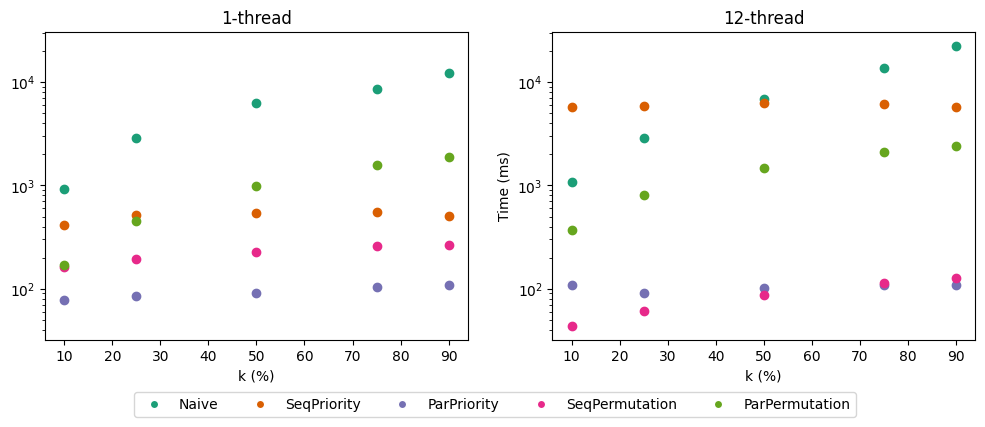

In [6]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

ax1.set_title("1-thread")
ax1.set_yscale("log")
ax1.set_xlabel("k (%)")

ax2.set_title("12-thread")
ax2.set_ylabel("Time (ms)")
ax2.set_xlabel("k (%)")

for name, color in zip(names, colors):
    ax1.scatter(single_core[single_core["name"] == name]["k_percent"],
                single_core[single_core["name"] == name]["real_time"], color=color)
    ax2.scatter(multi_core[multi_core["name"] == name]["k_percent"],
                multi_core[multi_core["name"] == name]["real_time"], color=color)

fig.legend(handles=custom_legends, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=6)